In [1]:
import os

import numpy as np
import pandas as pd

In [2]:
path = '/Users/adam/git/energy_py/energy_py/experiments/results/battery_tests/'

In [3]:
all_rewards = {}

for root, dirs, files in os.walk(path):
    if 'ep_rewards.csv' in files:
        run_name = root.split('/')[-1]
        
        #  could pull this out as a function
        data = np.genfromtxt(os.path.join(root, 'ep_rewards.csv'), delimiter='","', dtype=float)
        data = data[~np.isnan(data)]
        
        all_rewards[run_name] = data

In [4]:
all_rewards = pd.DataFrame.from_dict(all_rewards)

In [5]:
class ResultSet(object):
    def __init__(self, name):
        self.name = name

In [6]:
expts = [ResultSet('DQN'),
         ResultSet('DDQN'),
         ResultSet('priority')]

for expt in expts:
    df = all_rewards.filter(regex=expt.name)
    df.loc[:, 'episode'] = np.arange(1, df.shape[0]+1)
    df.loc[:, 'mean'] = df.mean(axis=1).values
    df.loc[:, 'std'] = df.std(axis=1).values
    window_len = 75
    
    df.loc[:, 'rolling_median'] = df.loc[:, 'mean'].rolling(window_len).median()
    df.loc[:, 'rolling_mean'] = df.loc[:, 'mean'].rolling(window_len).mean()
    df.loc[:, 'rolling_min'] = df.loc[:, 'mean'].rolling(window_len).min()
    df.loc[:, 'rolling_max'] = df.loc[:, 'mean'].rolling(window_len).max()
    
    df.loc[:, 'rolling_std'] = df.loc[:, 'mean'].rolling(window_len).std()
    
    expt.df = df

/Users/adam/anaconda3/envs/energy_py/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/adam/anaconda3/envs/energy_py/lib/python3.5/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Users/adam/anaconda3/envs/energy_py/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [7]:
test = expts[-1].df

In [8]:
test

,priority_1,priority_2,priority_3,priority_4,priority_5,priority_6,episode,mean,std,rolling_median,rolling_mean,rolling_min,rolling_max,rolling_std
0,-451.045121,-288.268441,-177.955825,465.825574,-103.736129,-267.417204,1,-117.371021,272.827676,NaN,NaN,NaN,NaN,NaN
1,-662.110854,-230.015113,-346.331625,-1536.656841,-59.495609,-148.990668,2,-425.942959,496.891436,NaN,NaN,NaN,NaN,NaN
2,295.324700,-166.818922,-403.794720,1626.909272,-49.645452,-159.701743,3,163.610448,628.550357,NaN,NaN,NaN,NaN,NaN
3,-640.579502,-205.373895,-284.005877,-1264.415543,-186.538346,-169.423879,4,-392.333863,399.635999,NaN,NaN,NaN,NaN,NaN
4,-1386.176463,-170.469552,-72.627068,299.973540,-92.682332,-126.058558,5,-220.434348,497.159149,NaN,NaN,NaN,NaN,NaN
5,-626.106799,-230.072622,-588.174702,679.777516,-97.444627,-75.848793,6,-133.124289,404.301876,NaN,NaN,NaN,NaN,NaN
6,-667.577090,-300.074342,-487.209576,-440.689235,-113.383694,-157.314019,7,-308.463994,220.028008,NaN,NaN,NaN,NaN,NaN
7,-86.525601,-288.814987,-496.711183,-959.062298,-138.944442,-171.387211,8,-304.777960,306.113696,NaN,NaN,NaN,NaN,NaN
8,585.300235,-237.260035,-307.645462,-418.068640,-123.572546,-85.019241,9,-82.466527,303.143096,NaN,NaN,NaN,NaN,NaN
9,366.075796,-234.002032,-172.759863,-1312.855041,-82.180467,-306.521183,10,-247.463256,480.229884,NaN,NaN,NaN,NaN,NaN


/Users/adam/anaconda3/envs/energy_py/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/Users/adam/anaconda3/envs/energy_py/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


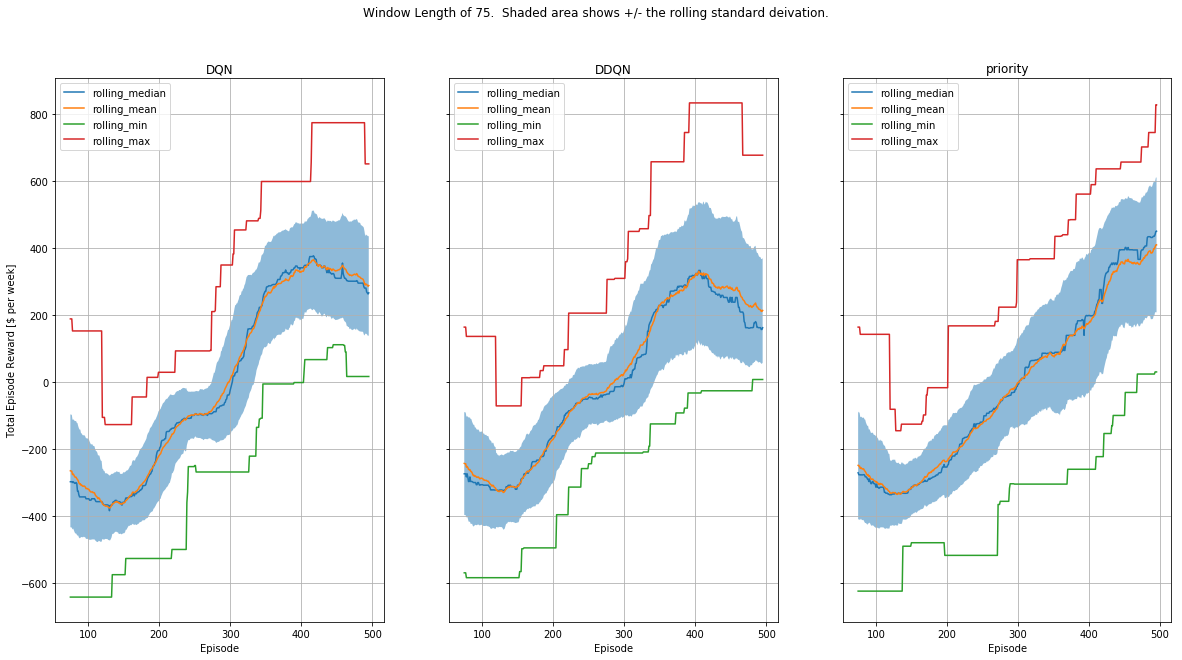

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3, figsize=(20,10), sharey=True)

fig.suptitle('Window Length of {}.  Shaded area shows +/- the rolling standard deivation.'.format(window_len))

for axe, expt in zip(ax, expts):
    expt.df.plot(x='episode', y=['rolling_median', 'rolling_mean', 'rolling_min', 'rolling_max'], title=expt.name, sharey=True, ax=axe)
    
    axe.fill_between(expt.df.loc[:, 'episode'], 
                     expt.df.loc[:, 'rolling_mean'] + expt.df.loc[:, 'rolling_std'],
                     expt.df.loc[:, 'rolling_mean'] - expt.df.loc[:, 'rolling_std'],
                    alpha=0.5)
    
    axe.set_xlabel('Episode')
    axe.set_ylabel('Total Episode Reward [$ per week]')
    axe.grid(True)